In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
DIR_DATASET = os.path.join(os.getcwd(), 'dataset')
DIR_SUBMISSIONS = os.path.join(os.getcwd(), 'submissions')

X = pd.read_csv(os.path.join(DIR_DATASET, 'X_train.csv'))
y = pd.read_csv(os.path.join(DIR_DATASET, 'y_train.csv'))
test = pd.read_csv(os.path.join(DIR_DATASET, 'test.csv'))

display(X)
display(y)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,has_cabin,is_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_group_Master,title_group_Miss,title_group_Mr,title_group_Mrs
0,1,3,22.0,1,0,7.2500,0,0,0,1,0,0,1,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,1,0,0,0,0,0,1
2,3,3,26.0,0,0,7.9250,0,1,1,0,0,0,1,0,1,0,0
3,4,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,1,0,0,1,0,0,1,0
887,888,1,19.0,0,0,30.0000,1,1,1,0,0,0,1,0,1,0,0
888,889,3,28.0,1,2,23.4500,0,0,1,0,0,0,1,0,1,0,0
889,890,1,26.0,0,0,30.0000,1,1,0,1,1,0,0,0,0,1,0


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Split the data into training and validation datasets

In [3]:
X.drop('PassengerId', axis=1, inplace=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Reset indexes
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

# Scale numerical features to improve model convergence and training speedb

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              712 non-null    int64  
 1   Age                 712 non-null    float64
 2   SibSp               712 non-null    int64  
 3   Parch               712 non-null    int64  
 4   Fare                712 non-null    float64
 5   has_cabin           712 non-null    int64  
 6   is_alone            712 non-null    int64  
 7   Sex_female          712 non-null    int64  
 8   Sex_male            712 non-null    int64  
 9   Embarked_C          712 non-null    int64  
 10  Embarked_Q          712 non-null    int64  
 11  Embarked_S          712 non-null    int64  
 12  title_group_Master  712 non-null    int64  
 13  title_group_Miss    712 non-null    int64  
 14  title_group_Mr      712 non-null    int64  
 15  title_group_Mrs     712 non-null    int64  
dtypes: float

In [5]:
X_train.describe()


,Pclass,Age,SibSp,Parch,Fare,has_cabin,is_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,title_group_Master,title_group_Miss,title_group_Mr,title_group_Mrs
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.300562,29.728118,0.494382,0.370787,31.951567,0.231742,0.598315,0.349719,0.650281,0.186798,0.089888,0.723315,0.044944,0.203652,0.598315,0.153090
std,0.836643,13.295467,1.010478,0.775968,46.313942,0.422241,0.490584,0.477216,0.477216,0.390023,0.286222,0.447674,0.207326,0.402996,0.490584,0.360327
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.458300,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,36.000000,1.000000,0.000000,30.695800,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Scales numerical columns
scaled_col = X_train.select_dtypes(include=['int64', 'float64']).columns

# Sale the train and validation datasets
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

# Scale features to have 0 average and 1 standard deviation
scaler = StandardScaler()
X_train_scaled[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_val_scaled[scaled_col] = scaler.fit_transform(X_val_scaled[scaled_col])

# Train the model

In [7]:
from sklearn.linear_model import LogisticRegression

## Train the model

In [8]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train['Survived'])

LogisticRegression()

## Evaluate the model

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Accuracy: 0.7933
Precision: 0.7647
Recall: 0.7123
F1-score: 0.7376

Confusion Matrix:


array([[90, 16],
       [21, 52]], dtype=int64)

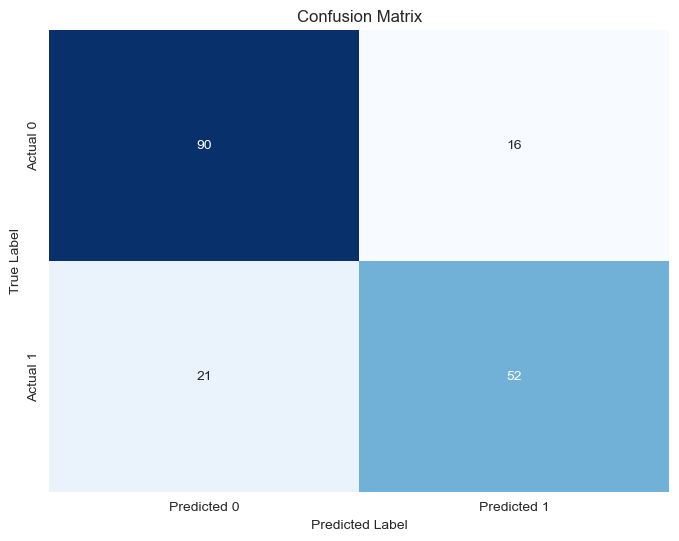

In [10]:
# Make predictions on the validation set
y_pred_array = model.predict(X_val_scaled)
y_pred = pd.DataFrame({'Survived': y_pred_array})

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Misclassified samples in validation set

In [30]:
# Get misclassified samples
misclassified_mask = y_val['Survived'] != y_pred['Survived']
misclassified = X_val[misclassified_mask]

misclassified_dataset = pd.concat([
    X_val[misclassified_mask],
    pd.DataFrame({
        'actual': y_val[misclassified_mask]['Survived'],
        'prediction': y_pred[misclassified_mask]['Survived']
    })], axis=1)